In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,re,nltk,difflib
sns.set_style("whitegrid")

def ding():
    os.system('afplay /System/Library/Sounds/Submarine.aiff')

### Choisir le match

In [2]:
# rep="/Users/gilles/Downloads/Traitements_GB/"
rep="/Users/gilles/Github/AMBK-SportsCom/Chaines/Traitements_GB/"
match="FR-AR"
# match="FR-NZ"
nFile="%s-fr-GB.xlsx"%match

In [3]:
df=pd.read_excel(rep+nFile,index_col=0)

In [4]:
df.iloc[80:120]

,Transcription,Cat,Lemme,Modif,Referent,numChaine,chaineIndex,chaineDep,chaineApp,oldReferent,oldNumChaine,oldChaineIndex,oldChaineDep
80,.,SENT,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,dans,PRP,dans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,ce,PRO:DEM,ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,cas,NOM,cas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,-là,ADV,là,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,",",PUN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,on,PRO:PER,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,peut,VER:pres,pouvoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,trouver,VER:infi,trouver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,une,DET:ART,un,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nbMots=len(df[~df.Cat.isin(["PUN","SENT"])])
print(match,nbMots)

FR-AR 16961


### Calcul des chaines

In [6]:
maxNumChaine=int(df.numChaine.max())
maxNumChaine

1088

In [7]:
chaines={}
lChaines={}
for num in range(maxNumChaine):
    n=num+1
    dfChaine=df.loc[df.numChaine==n]
    try:
        chaines[n]={"ref":dfChaine.Referent.values[0],"chaine":{}}
        indexMax=int(dfChaine.chaineIndex.max())
        if indexMax not in lChaines:
            lChaines[indexMax]=0
        lChaines[indexMax]+=1
        for ind in range(indexMax):
            i=ind+1
            dfIndex=dfChaine.loc[dfChaine.chaineIndex==i]
            chaines[n]["chaine"][i]=dfIndex[["Cat","Transcription"]].to_dict()
    except:
        print("pb",n,end=", ")
        # display(dfChaine)
print()
print(lChaines)

pb 17, pb 30, pb 37, pb 88, pb 139, pb 146, pb 183, pb 184, pb 185, pb 190, pb 200, pb 420, pb 508, pb 511, pb 518, pb 539, pb 551, pb 561, pb 570, pb 572, pb 582, pb 583, pb 584, pb 603, pb 604, pb 617, pb 622, pb 638, pb 670, pb 673, pb 674, pb 737, pb 738, pb 764, pb 865, pb 877, pb 909, pb 930, pb 984, pb 1009, pb 1068, 
{1: 662, 4: 42, 3: 119, 2: 164, 9: 7, 5: 20, 12: 1, 6: 17, 11: 4, 13: 2, 8: 1, 7: 7, 10: 1}


#### Calcul de la longueur maximale des chaines

In [8]:
maxLChaines=max(lChaines.keys())
for l in range(maxLChaines):
    if l+1 not in lChaines:
        lChaines[l+1]=0
colors = sns.color_palette('pastel',n_colors=maxLChaines)

#### Nombre de chaines par longueur

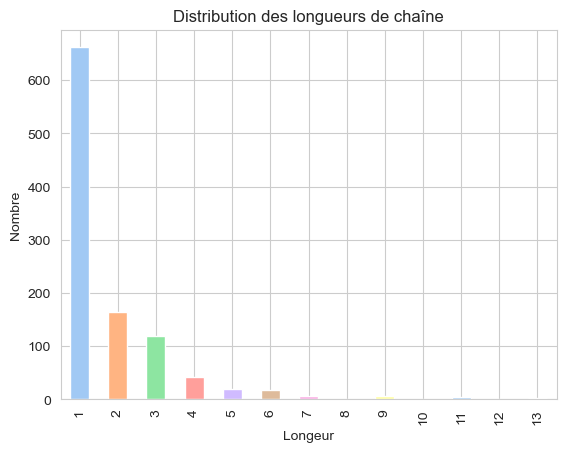

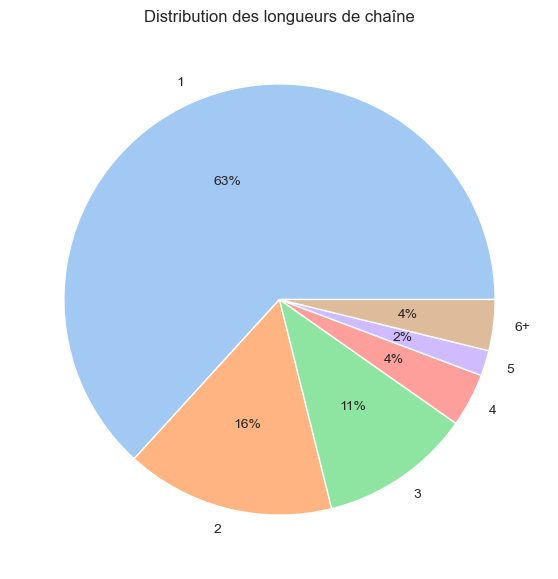

In [9]:
pieCut=5
dfDistLong=pd.DataFrame.from_dict(lChaines,orient="index").sort_index()
dfDistLong.name="Longueur de chaine"
dfDistLong.plot.bar(y=0,color=colors,ylabel="Nombre",xlabel="Longeur",title="Distribution des longueurs de chaîne",legend=False)
plt.savefig("JE-BP-LongChaines-%s.pdf"%match)
dfTemp=dfDistLong[:pieCut].copy()
autres=dfDistLong[pieCut:].sum()
autres.index=["%d+"%(pieCut+1)]
dfTemp=pd.concat([dfTemp,autres])
ax=dfTemp.plot.pie(y=0,colors=colors, autopct='%.0f%%',title="Distribution des longueurs de chaîne",figsize=(7,7),legend=False)
ax.set_ylabel(None)
dfTemp.to_excel("DistLongChaine-%s.xlsx"%match)
plt.savefig("JE-PC-LongChaines-%s.pdf"%match)

#### Nombre de chaines par longueur par référent

In [10]:
refChaines={}
lRefChaines={}#
# print(lRefChaines)
for k,v in chaines.items():
    ref=chaines[k]["ref"]
    chaine=chaines[k]["chaine"]
    if ref not in refChaines:
        refChaines[ref]=[]
        lRefChaines[ref]={i:0 for i in range(1,maxLChaines+1)}
    refChaines[ref].append(chaines[k]["chaine"])
    longueur=max(chaines[k]["chaine"].keys())
    if longueur not in lRefChaines[ref]:
        lRefChaines[ref][longueur]=0
    lRefChaines[ref][longueur]+=1
dfRefChaines=pd.DataFrame.from_dict(lRefChaines).sort_index().T

dfRefChaines["sum"]=dfRefChaines.iloc[:,0:maxLChaines].sum(axis=1)
dfRefChaines=dfRefChaines.sort_values(by='sum',ascending=False)
dfRefChaines=dfRefChaines.drop(columns="sum")
display(dfRefChaines.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13
GTF,50,26,16,8,3,2,0,0,2,0,0,0,0
GTA,58,12,10,2,2,5,2,0,0,0,1,0,1
J-F9,46,4,3,2,1,2,0,0,0,0,0,0,0
J-F10,32,7,4,3,3,1,0,0,0,0,0,0,0
thierry,34,4,2,1,0,0,0,0,0,0,1,0,1


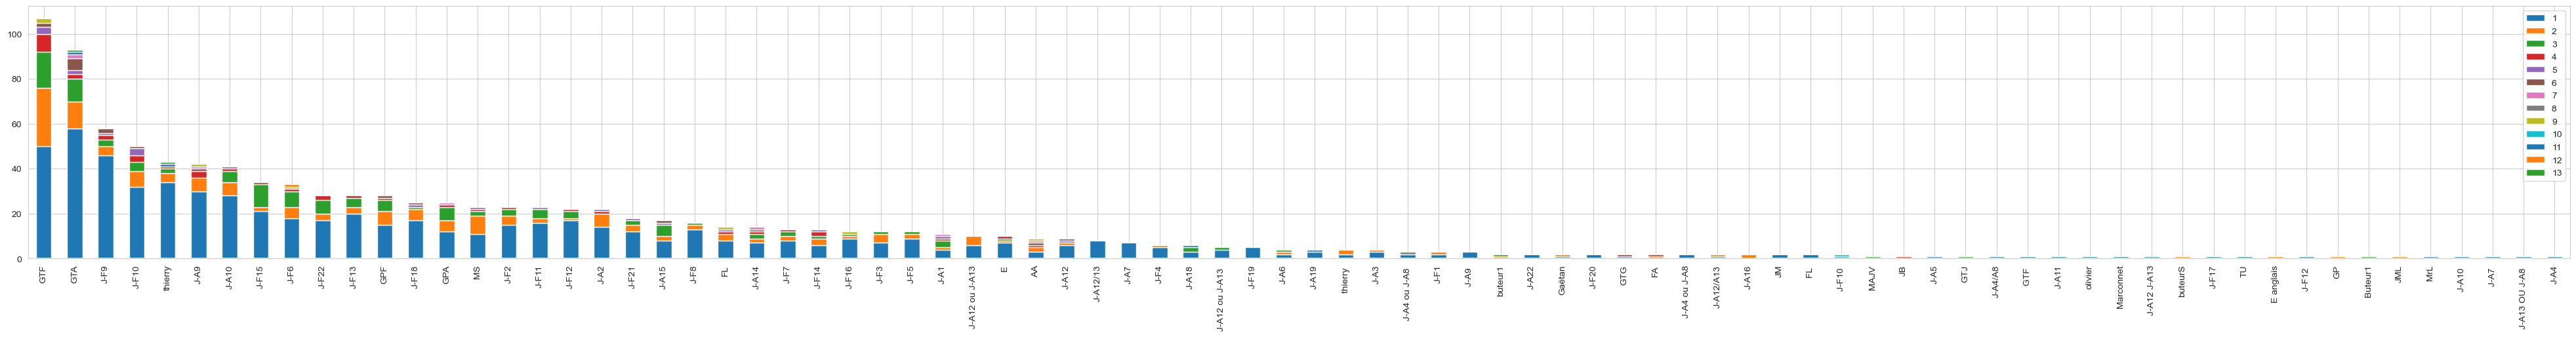

In [11]:
dfRefChaines.plot(kind="bar",stacked=True,figsize=(50,5))
plt.savefig("JE-SB-DistChaines-%s.pdf"%match)

#### Calcul du nombre de reprises par catégorie
- chaineIndex renseignée
- chaineDep différent de root (≠0)

In [12]:
print(match)
catTable=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby("Cat").count()[["Lemme"]].loc["NAM PRO:REL PRO:PER NOM DET:POS PRO:DEM PRO:IND".split(" ")]
display(catTable)
print(catTable.sum())

FR-AR


,Lemme
Cat,
NAM,12
PRO:REL,175
PRO:PER,462
NOM,27
DET:POS,56
PRO:DEM,2
PRO:IND,1


Lemme    735
dtype: int64


#### Détail des reprises

In [13]:
dfGroupReprises=df[(df.chaineIndex.notnull())&(df.chaineDep>0)].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].sum()
dfGroupReprises

Cat Transcription
numChaine chaineIndex                       
4.0       2.0          PRO:PER            il
          3.0          PRO:PER            il
          4.0          DET:POS           ses
7.0       3.0          PRO:REL           qui
9.0       2.0          PRO:PER            il
...                        ...           ...
1080.0    2.0          DET:POS           son
          4.0          DET:POS           son
          5.0          PRO:PER            il
          6.0          PRO:PER            il
1082.0    2.0          PRO:REL           qui

[698 rows x 2 columns]

In [14]:
print(match,len(dfGroupReprises),nbMots,"%2.1f%%"%(len(dfGroupReprises)/nbMots*100))

FR-AR 698 16961 4.1%


#### Détail des références

In [15]:
dfGroupeReferents=df[(df.chaineIndex.notnull())].groupby(["numChaine","chaineIndex"])[["Cat","Transcription"]].agg(" ".join)
dfGroupeReferents

Cat Transcription
numChaine chaineIndex                       
1.0       1.0          NAM NAM  David Skrela
2.0       1.0              NOM       Roncero
3.0       1.0              NAM        Pichot
4.0       1.0              NAM     Hernandez
          2.0          PRO:PER            il
...                        ...           ...
1085.0    1.0              NAM      Corletto
          2.0              NAM      Corletto
1086.0    1.0              NAM        France
1087.0    1.0              ADJ     Argentine
1088.0    1.0              NAM       Thierry

[1811 rows x 2 columns]

In [16]:
print(match,len(dfGroupeReferents),nbMots,"%2.1f%%"%(len(dfGroupeReferents)/nbMots*100))

FR-AR 1811 16961 10.7%


In [17]:
print(dfGroupeReferents.to_string())

                                                                           Cat                                                          Transcription
numChaine chaineIndex                                                                                                                                
1.0       1.0                                                          NAM NAM                                                           David Skrela
2.0       1.0                                                              NOM                                                                Roncero
3.0       1.0                                                              NAM                                                                 Pichot
4.0       1.0                                                              NAM                                                              Hernandez
          2.0                                                          PRO:PER                      

# Rapprochements entre chaines et autres données

In [39]:
dfGen=pd.read_csv(rep+"CorrespondancesAction-PlayVsColourVsSupportaire.csv",sep=";")

In [40]:
dfGen.columns="lNum tDeb tFin penalite type event action actComm comm rem1 rem2 err1 err2 commType commTypeCorr".split(" ")

In [41]:
dTours=dfGen.loc[dfGen.comm.notnull()][["comm","commType","tDeb","tFin"]].to_dict(orient="index")
lTours=[v for k,v in dTours.items()]
# lTours

In [42]:
nTours={}
for nT,tour in enumerate(lTours):
    if not tour["comm"].startswith("PROB"):
        refComm,comm=tour["comm"].split(" ",1)
        nTours[nT]=(nltk.wordpunct_tokenize(comm), 
                    refComm, tour["commType"], tour["tDeb"], tour["tFin"])
# nTours

In [43]:
def nextMot(iT,iM):
    # print("nM",nM,"iM",iM,"iT",iT,len(nTours[iT][0])-nPunct)
    if iM+1<len(nTours[iT][0]):
        rM=iM+1
        rT=iT
        rPrevM=prevM
        rPunct=nPunct
        print("next word",rM,len(nTours[iT][0])-nPunct)
    else:
        print("next turn")
        rT=iT+1
        rPrevM=prevM+iM+1+nPunct
        rM=0
        rPunct=0
    return rT,rM,rPrevM,rPunct
    
iT=0
prevM=0
iM=0
nPunct=0
for nM,mot in enumerate(df.Transcription.to_list()):
    print(nM-prevM,iM,mot)
    if mot in ",.?!":
        nPunct+=1
        print("sauter",nM-prevM,len(nTours[iT][0])-nPunct)
        if iM==len(nTours[iT][0]):
            print("ponctuation finale")
            iT+=1
            prevM+=iM+nPunct
            iM=0
            nPunct=0
    elif mot==nTours[iT][0][iM]:
        print (nTours[iT][1:])
        iT,iM,prevM,nPunct=nextMot(iT,iM)
    else:
        print("pb",nM,iM,prevM,mot,nTours[iT][0][iM])
        iT,iM,prevM,rPunct=nextMot(iT,iM)


0 0 après
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 1 22
1 1 avoir
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 2 22
2 2 demandé
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 3 22
3 3 si
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 4 22
4 4 tout
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 5 22
5 5 le
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 6 22
6 6 monde
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 7 22
7 7 était
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 8 22
8 8 prêt
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 9 22
9 9 ,
sauter 9 21
10 9 le
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 10 21
11 10 coup
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')
next word 11 21
12 11 d'

KeyError: 385

In [44]:
trans=[]
transNum={}
for n,t in enumerate(df.Transcription.to_list()):
    if str(t) not in list(".:,;!?")+["..."]:
        chunks=[c for c in re.split("[-']",str(t)) if c!=""]
        # if "-" in str(t):
        #     print(t,chunks)
        for chunk in chunks:
            trans.append(chunk.strip("#"))
            if n not in transNum:
                transNum[n]=[]
            transNum[n].append(len(trans)-1)
# trans

In [64]:
def chaineSyn(ops):
    result=[]
    for op in ops:
        if op[0]=="equal":
            for i in range(op[3],op[4]):
                result.append(i)
    return result

In [67]:
i=0
nSkips=[312,330,1000,1106,1112,1124,18,96,108,128,172,184,193,
        200,247,256,257,269,445,480,498,504,515,533,547,550, 
        636,668,717,747,754,775,788,799,806,832,838,979,
        1036,1049,1050,1051,1064,1065,1067,1068,1069,1071,
        1101,1114,1119,1173,1175,1222,1227,1228,1233,1235,1246,1261,1262,
        1310,1332,1354,1413,1496,1528,1550,1563,1570,1571,1592,1595,
        1658,1681,1694,1700,1715,1721,1726,1728,1758,1764,1823,1943,2007,2031,2082,2123,
        2332,
        192,423,645,725,794,1023,1307,1702,1760,1762,1781,1795,1796,1824,1838,1876,
        1915,1928,1933,1934,1936,1937,1948,1950,1951,1958,1974,1996,
        2009,2013,2025,2027,2036,2079,2114,2121,2128,2132,2133,2136,2138,2140,2177,
        2180,2207,2225,2235,2288,2311,2318,2320,2357,2367,
        2400,2444,2449,2450,2462,2465,2483,2502,2503,2547,2556,2596,2628,2654]
newSkips=[]
# nSkips=[]
# for t in nTours:
for t in range(100):
    a=nTours[t][0]
    b=trans[i:i+250]
    c=nTours[t][1:]
    if t in nSkips:
        print (t)
        print(a)
        print(trans[i:i+len(a)+10])
        print()
        continue
    s=difflib.SequenceMatcher(lambda x: x in ",';.?!-*".split()+["...","hein","ha","ah","hé","oui"],a,b)
    opcodes=s.get_opcodes()
    synEqs=chaineSyn(opcodes)
    for synEq in synEqs:
        print(b[synEq], end=" ")
    print()
    if opcodes[-1][0]=="insert":
        last=opcodes[-2]
        # print (opcodes)
        aLast=last[2]
        bLast=last[4]
        print (t,i+bLast)
        print(a[:aLast])
        print(b[:bLast])
        print(c)
        i+=bLast
        print()
    else:
        print("==============")
        print(t,a,trans[i:i+len(a)+10])
        newSkips.append(t)
        print("==============")
        # print(a)
        # print(b[:len(a)+10])
        # print()


après avoir demandé si tout le monde était prêt le coup d envoi de la coupe du monde deux mille sept 
0 21
['après', 'avoir', 'demandé', 'si', 'tout', 'le', 'monde', 'était', 'prêt', 'le', 'coup', 'd', "'", 'envoi', 'de', 'la', 'coupe', 'du', 'monde', 'deux', 'mille', 'sept']
['après', 'avoir', 'demandé', 'si', 'tout', 'le', 'monde', 'était', 'prêt', 'le', 'coup', 'd', 'envoi', 'de', 'la', 'coupe', 'du', 'monde', 'deux', 'mille', 'sept']
('spk1-001', 'Colour commentary', '00:12:24.60', '00:12:28.32')

est donné par David Skrela 
1 26
['est', 'donné', 'par', 'David', 'Skrela']
['est', 'donné', 'par', 'David', 'Skrela']
('spk1-002', 'Play by play', '00:12:28.56', '00:12:30.92')

allez de suite dans le camp euh 
2 33
['allez', 'de', 'suite', 'dans', 'le', 'camp', 'euh']
['allez', 'de', 'suite', 'dans', 'le', 'camp', 'euh']
('spk2-001', 'Colour commentary', '00:12:32.00', '00:12:33.40')

argentin 
3 34
['argentin']
['argentin']
('spk2-002', 'Colour commentary', '00:12:34.00', '00:12:34.56'

In [51]:
newSkips

[]

In [52]:
transNum

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 10: [9],
 11: [10],
 12: [11],
 13: [12],
 14: [13],
 15: [14],
 16: [15],
 17: [16],
 18: [17],
 19: [18],
 20: [19],
 21: [20],
 22: [21],
 23: [22],
 24: [23],
 25: [24],
 26: [25],
 28: [26],
 29: [27],
 30: [28],
 31: [29],
 32: [30],
 33: [31],
 34: [32],
 35: [33],
 37: [34],
 38: [35],
 39: [36],
 40: [37],
 41: [38],
 43: [39],
 44: [40],
 45: [41],
 46: [42],
 47: [43],
 49: [44],
 50: [45],
 52: [46],
 53: [47],
 54: [48],
 55: [49],
 57: [50],
 58: [51],
 59: [52],
 60: [53],
 61: [54],
 62: [55],
 64: [56],
 65: [57],
 66: [58],
 67: [59],
 68: [60],
 69: [61],
 71: [62],
 72: [63],
 73: [64],
 74: [65],
 75: [66],
 76: [67],
 77: [68],
 78: [69, 70],
 79: [71],
 81: [72],
 82: [73],
 83: [74],
 84: [75],
 86: [76],
 87: [77],
 88: [78],
 89: [79],
 90: [80],
 92: [81],
 94: [82],
 95: [83],
 96: [84],
 98: [85],
 99: [86],
 100: [87],
 101: [88],
 102: [89],
 103: [90],
 104: [91],
 105: [92